<a href="https://colab.research.google.com/github/Rugved2204/pytorch_fundamentals/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt




We will be using the FashionMNIST from torchvision datasets

In [3]:
#Setting up the data
#We are generally going to import it from torchvision library
#The torchvision library contains different datasets
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)


100%|██████████| 26421880/26421880 [00:00<00:00, 115817170.63it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6052059.77it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 67679272.94it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7019595.90it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data)

60000

In [27]:
len(test_data)

10000

In [28]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [18]:
train_data.classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_to_idx = train_data.class_to_idx

In [20]:
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [21]:
image, label = train_data[0]

In [22]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [23]:
#Here it is in the format of color channels,height and width

#grayscale images of 1 color channels

train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
class_name = train_data.classes

In [17]:
class_name[label]

'Ankle boot'

## Visualizing our data

Image shape: torch.Size([1, 28, 28])


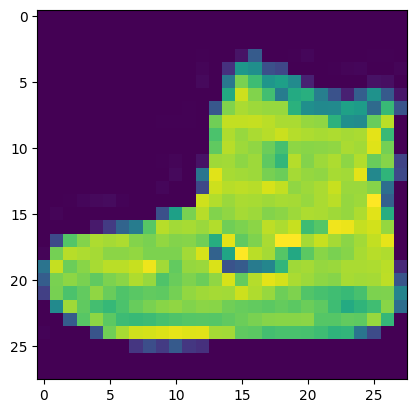

In [19]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

In [15]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_name[label])
plt.axis(False)

NameError: ignored

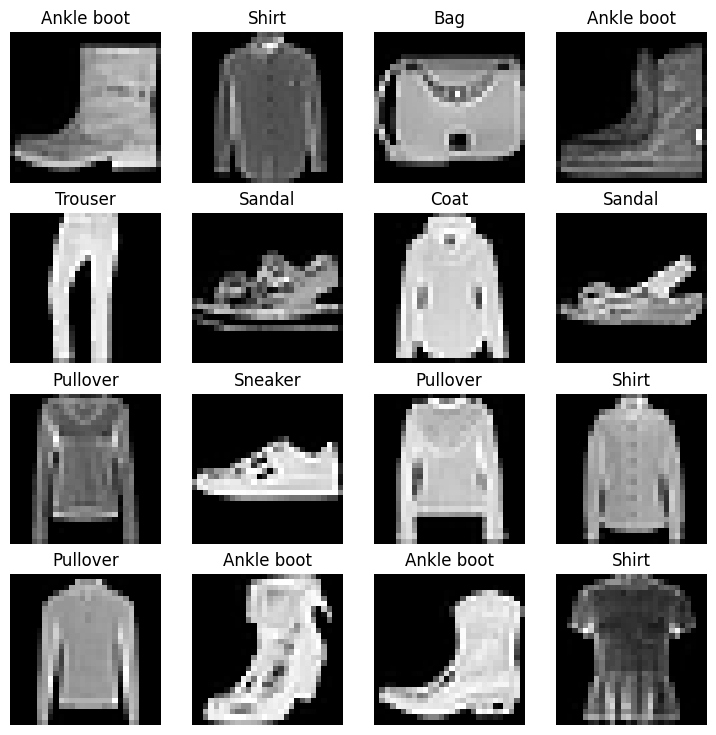

In [24]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range (1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)




I dont think we can model these images with only linear lines, we will look at it afterwards

#Preparing the data

Right now our data is in the form of pytorch datsets

Dataloader turns our dataset into a python iterable

More specifically , we want to turn our data into batches(or mini-batches) so that it is more computationally efficient and gives the neural network more chance to update its gradient per epoch

In [5]:

train_data, test_data


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
from torch.utils.data import DataLoader

#batch size is a hyper parameter
BATCH_SIZE = 32

#Turn the datset into batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size= BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f0213a9db10>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0213a9ce80>)

In [10]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [11]:
10000/32

312.5

In [7]:
#Interacting with the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(torch.Size([1, 28, 28]), torch.Size([]))

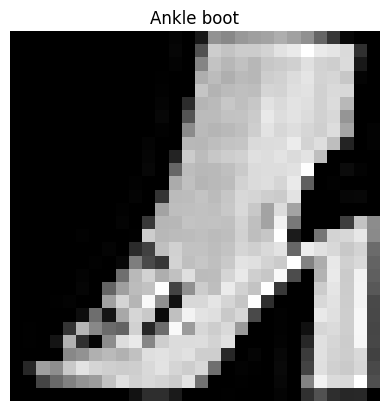

In [10]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()

img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)
img.shape, label.shape

#Building a Baseline Model

A base line model is a simple model which will try and improve upon with subsequent models

In [11]:
#Create a flatten layer

flatten_model = nn.Flatten()

#Getting a simple sample
x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [15]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [16]:
torch.manual_seed(42)
device = "cpu"

model_0 = FashionMNISTModelV0(input_shape=784,hidden_units=10,output_shape=10).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [18]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [19]:
###Setting up loss function , optimizers
#Since we are working on a multiclass classification we will be using nn.CrossEntropyLoss()
#Optimizer will be the same i.e SGD

def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.
    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)



In [21]:
#we will check how fast the model runs

from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  total_time = end-start
  print(f"Train time on {device}: {total_time: 3f} seconds")
  return total_time

In [22]:
start_time= timer()

#3
end_time = timer()
print_train_time(start=start_time, end = end_time, device = "cpu")

Train time on cpu:  0.000039 seconds


3.8735000089218374e-05

Now we are going to create a testing and training loop

We are training on batches of data

1. Loop through epochs

2. Loop through training batches, perform training steps, clalculate the train loss per batch

3. Loop through testing batches, perform testing steps, calculate the test loss per batch

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")

  train_loss = 0

  ##Adding a loop to loop through thr training batches

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)


    loss = loss_fn(y_pred, y)
    train_loss += loss


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch% 400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  #Divide the total training loss ny length of train dataloader

  train_loss /= len(train_dataloader)

  ###Testing
  test_loss = 0
  test_acc=0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #Forward pass
      test_pred = model_0(X_test)

      #Calculate the loss accumulatively

      test_loss = test_loss + loss_fn(test_pred,y_test)

      #Calculate the accuracy

      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc {test_acc:.4f}")



train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5904 | Test loss: 0.5095 | Test acc 82.0387
Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4763 | Test loss: 0.4799 | Test acc 83.1969
Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4766 | Test acc 83.4265
Train time on cpu:  33.455671 seconds


#Make predicitions and get Model 0  results

In [27]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicitiong on data loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():

    y_pred = model(X)

    loss += loss_fn(y_pred,y)

    acc += accuracy_fn(y_true =y,
                      y_pred = y_pred.argmax(dim=1))


    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc":acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)


model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0005518352263607085,
 'model_acc': 0.2995207667731629}

In [2]:
##Setting up device agnostic code

!nvidia-smi

Wed Jun 21 19:35:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import torch
torch.cuda.is_available()

True